In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Accuracy of HMC vs. VA for CPL/Ridge

In [2]:
# load HMC results
all_thetas = np.load('../../../data/commaai/mcmc/filtered_gaussian_resampled/Ridge/all_thetas_L100_3000.npy')
# load VA results
lower_bounds = np.load('../../../data/commaai/va/filtered_gaussian_resampled/Ridge/lower_bounds_factor_4_50.npy')
mu_ts = np.load('../../../data/commaai/va/filtered_gaussian_resampled/Ridge/mu_ts23_factor_4_50.npy')
B_ts = np.load('../../../data/commaai/va/filtered_gaussian_resampled/Ridge/B_ts23_factor_4_50.npy')
d_ts = np.load('../../../data/commaai/va/filtered_gaussian_resampled/Ridge/d_ts23_factor_4_50.npy')

In [3]:
# take last 1% of VA results
iterations = len(lower_bounds)
mu_t = np.mean(mu_ts[int(0.9*iterations):iterations,:], axis = 0)
B_t = np.mean(B_ts[int(0.9*iterations):iterations,:], axis = 0)
d_t = np.mean(d_ts[int(0.9*iterations):iterations,:], axis = 0)
var = np.sqrt(np.diag(B_t.dot(B_t.T) + d_t**2))
samples_tau = np.exp(np.random.normal(mu_t[10], var[10], 100000))
#var[10] = np.std(samples_tau)
mu_t[10] = np.mean(samples_tau)
# take results for HMC after burnin
burnin = 500
# transform log tau
all_thetas2 = all_thetas.copy()
all_thetas2[:,10] = np.exp(all_thetas[:,10])
mu_hmc = np.mean(all_thetas2[500:,:], axis = 0)
std_hmc = np.std(all_thetas[500:,:], axis = 0)

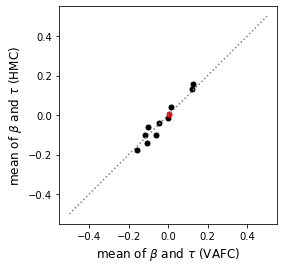

In [4]:
plt.scatter(mu_t[0:10], mu_hmc[0:10], color = 'black', s = 25)
plt.scatter(mu_t[10], mu_hmc[10], color = 'red', s = 25)
plt.plot([-.5,.5], [-.5,.5], color = 'grey', linestyle = ':')
plt.xlabel(str('mean of ' + r'$\beta$' + ' and ' + r'$\tau$' + ' (VAFC)'), fontsize=12)
plt.ylabel(str('mean of ' + r'$\beta$' + ' and ' + r'$\tau$' + ' (HMC)'), fontsize=12)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()
plt.savefig('../../../data/commaai/accuracy/CPL_Ridge_means.png', dpi = 900, bbox_inches='tight') 

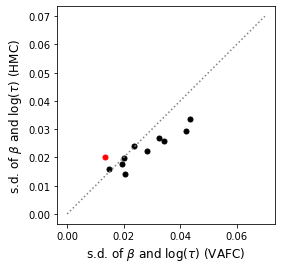

In [5]:
plt.scatter(var[0:10], std_hmc[0:10], color = 'black', s = 25)
plt.scatter(var[10], std_hmc[10], color = 'red', s = 25)
plt.plot([0,.07], [0,.07], color = 'grey', linestyle = ':')
plt.xlabel(str('s.d. of ' + r'$\beta$' + ' and ' + r'$\log(\tau)$' + ' (VAFC)'), fontsize=12)
plt.ylabel(str('s.d. of ' + r'$\beta$' + ' and ' + r'$\log(\tau)$' + ' (HMC)'), fontsize=12)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()
plt.savefig('../../../data/commaai/accuracy/CPL_Ridge_sd.png', dpi = 900, bbox_inches='tight') 

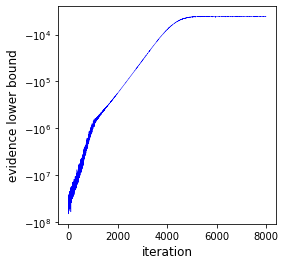

In [8]:
fig, ax = plt.subplots()
ax.plot(lower_bounds[0:8000], color = 'blue', linewidth = '0.5')
ax.set_yscale('symlog')
ax.set_ylabel('evidence lower bound', fontsize = 12)
ax.set_xlabel('iteration', fontsize=12)
ax.set_box_aspect(1)
plt.savefig('../../../data/commaai/accuracy/CPL_Ridge_convergence.png', dpi = 900, bbox_inches='tight') 

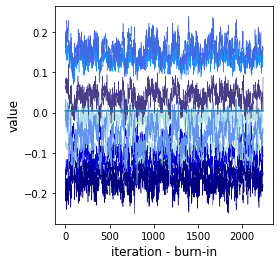

In [7]:
colors = ['azure', 'powderblue', 'darkblue', 'darkslateblue', 'lightblue', 'navy', 'dodgerblue', 'royalblue', 'mediumblue', 'cornflowerblue']
fig, ax = plt.subplots()
for i in range(0,10):
    ax.plot(all_thetas[500:,i], color = colors[i], linewidth = 0.5)
ax.plot(np.exp(all_thetas[500:,10]))
ax.set_box_aspect(1)
ax.set_ylabel('value', fontsize=12)
ax.set_xlabel('iteration - burn-in', fontsize=12)
plt.savefig('../../../data/commaai/accuracy/CPL_Ridge_hmc_convergence.png', dpi = 900, bbox_inches='tight') 

## Accuracy for CIL/Ridge

In [150]:
# load HMC results
all_thetas = np.load('../../../data/commaai/mcmc/unfiltered_gaussian_resampled/Ridge/.npy')
# load VA results
lower_bounds = np.load('../../../data/commaai/va/unfiltered_gaussian_resampled/Ridge/lower_bounds_factor_50.npy')
mu_ts = np.load('../../../data/commaai/va/unfiltered_gaussian_resampled/Ridge/mu_ts23_factor_50.npy')
B_ts = np.load('../../../data/commaai/va/unfiltered_gaussian_resampled/Ridge/B_ts23_factor_50.npy')
d_ts = np.load('../../../data/commaai/va/unfiltered_gaussian_resampled/Ridge/d_ts23_factor_50.npy')

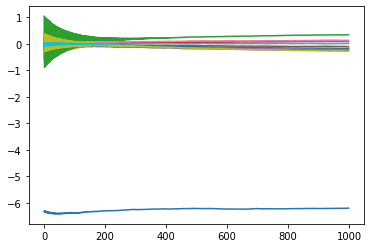

In [151]:
plt.plot(all_thetas)

In [144]:
# take last 1% of VA results
iterations = len(lower_bounds)
mu_t = np.mean(mu_ts[int(0.95*iterations):iterations,:], axis = 0)
B_t = np.mean(B_ts[int(0.95*iterations):iterations,:], axis = 0)
d_t = np.mean(d_ts[int(0.95*iterations):iterations,:], axis = 0)
var = np.sqrt(np.diag(B_t.dot(B_t.T) + d_t**2))
samples_tau = np.exp(np.random.normal(mu_t[10], var[10], 100000))
#var = np.genfromtxt('../../../data/commaai/va/unfiltered_gaussian_resampled/Ridge/Var.csv', delimiter = ',')
#var[10] = np.std(samples_tau)
mu_t[10] = np.mean(samples_tau)
# take results for HMC after burnin
burnin = 100
# transform log tau
all_thetas2 = all_thetas.copy()
all_thetas2[:,10] = np.exp(all_thetas[:,10])
mu_hmc = np.mean(all_thetas2[500:,:], axis = 0)
std_hmc = np.std(all_thetas[500:,:], axis = 0)

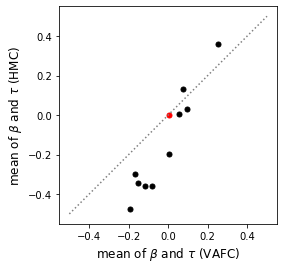

In [145]:
plt.scatter(mu_t[0:10], mu_hmc[0:10], color = 'black', s = 25)
plt.scatter(mu_t[10], mu_hmc[10], color = 'red', s = 25)
plt.plot([-.5,.5], [-.5,.5], color = 'grey', linestyle = ':')
plt.xlabel(str('mean of ' + r'$\beta$' + ' and ' + r'$\tau$' + ' (VAFC)'), fontsize=12)
plt.ylabel(str('mean of ' + r'$\beta$' + ' and ' + r'$\tau$' + ' (HMC)'), fontsize=12)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()
plt.savefig('../../../data/commaai/accuracy/CIL_Ridge_means.png', dpi = 900, bbox_inches='tight') 

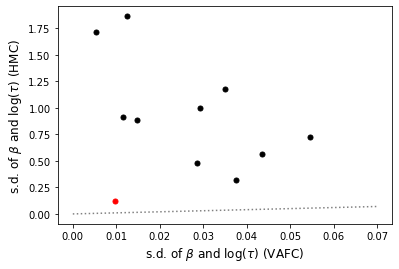

In [148]:
plt.scatter(var[0:10], std_hmc[0:10], color = 'black', s = 25)
plt.scatter(var[10], std_hmc[10], color = 'red', s = 25)
plt.plot([0,.07], [0,.07], color = 'grey', linestyle = ':')
plt.xlabel(str('s.d. of ' + r'$\beta$' + ' and ' + r'$\log(\tau)$' + ' (VAFC)'), fontsize=12)
plt.ylabel(str('s.d. of ' + r'$\beta$' + ' and ' + r'$\log(\tau)$' + ' (HMC)'), fontsize=12)
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
plt.savefig('../../../data/commaai/accuracy/CIL_Ridge_sd.png', dpi = 900, bbox_inches='tight') 

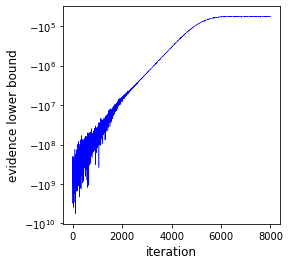

In [147]:
fig, ax = plt.subplots()
ax.plot(lower_bounds[0:8000], color = 'blue', linewidth = '0.5')
ax.set_yscale('symlog')
ax.set_ylabel('evidence lower bound', fontsize = 12)
ax.set_xlabel('iteration', fontsize=12)
ax.set_box_aspect(1)
plt.savefig('../../../data/commaai/accuracy/CIL_Ridge_convergence.png', dpi = 900, bbox_inches='tight') 

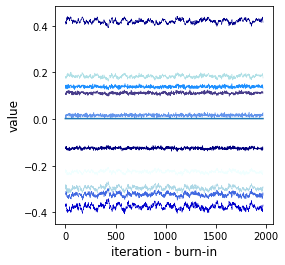

In [142]:
colors = ['azure', 'powderblue', 'darkblue', 'darkslateblue', 'lightblue', 'navy', 'dodgerblue', 'royalblue', 'mediumblue', 'cornflowerblue']
fig, ax = plt.subplots()
for i in range(0,10):
    ax.plot(all_thetas[500:,i], color = colors[i], linewidth = 0.5)
ax.plot(np.exp(all_thetas[500:,10]))
ax.set_box_aspect(1)
ax.set_ylabel('value', fontsize=12)
ax.set_xlabel('iteration - burn-in', fontsize=12)
plt.savefig('../../../data/commaai/accuracy/CIL_Ridge_hmc_convergence.png', dpi = 900, bbox_inches='tight') 